# Class Challenge: Image Classification of COVID-19 X-rays
# Task 1 [Total points: 30]

## Setup

* This assignment involves the following packages: 'matplotlib', 'numpy', and 'sklearn'. 

* If you are using conda, use the following commands to install the above packages:<br>
```shell
conda install matplotlib
conda install numpy
conda install -c anaconda scikit-learn
```

* If you are using pip, use use the following commands to install the above packages: <br> 
```shell
pip install matplotlib
pip install numpy
pip install sklearn
```

## Data

Please download the data using the following link: [COVID-19](https://drive.google.com/file/d/1Y88tgqpQ1Pjko_7rntcPowOJs_QNOrJ-/view). 

* After downloading 'Covid_Data_GradientCrescent.zip', unzip the file and you should see the following data structure:


|--all<br>
|--------train<br>
|--------test<br>
|--two<br>
|--------train<br>
|--------test<br>


* Put the 'all' folder, the 'two' folder and this python notebook in the **same directory** so that the following code can correctly locate the data.  



## [20 points] Binary Classification: COVID-19 vs. Normal

In [1]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

'2.1.0'

#### Load Image Data

In [2]:
DATA_LIST = os.listdir('two/train')
DATASET_PATH  = 'two/train'
TEST_DIR =  'two/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 40
LEARNING_RATE = 0.0005 # start off with high rate first 0.001 and experiment with reducing it gradually 

#### Generate Training and Validation Batches

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')

train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="binary")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",seed=42,
                                                  class_mode="binary")

C:\Users\tanzi\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 104 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


#### [10 points] Build Model
Hint: Starting from **a pre-trained model** typically helps performance on a new task, e.g. starting with weights obtained by training on ImageNet. 

In [4]:
# raise NotImplementedError("Build your model based on an architecture of your choice "
#                           "A sample model summary is shown below")

# Implement VGG16
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

# vgg_16 = VGG16(include_top=False, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
vgg_16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3), pooling='None', classes=2)
# Arguments
    # include_top: whether to include the 3 fully-connected layers at the top of the network.
    # weights: one of None (random initialization) or 'imagenet' (pre-training on ImageNet).
    # input_tensor: optional Keras tensor (i.e. output of layers.Input()) to use as image input for the model.
    # input_shape: optional shape tuple, 
                    # only to be specified if include_top is False 
                    # (otherwise the input shape has to be (224, 224, 3) (with 'channels_last' data format) 
                    # or (3, 224, 224) (with 'channels_first' data format). 
                    # It should have exactly 3 inputs channels, 
                    # and width and height should be no smaller than 32. E.g. (200, 200, 3) would be one valid value.
    # pooling: Optional pooling mode for feature extraction when include_top is False.
                    # None means that the output of the model will be the 4D tensor output of the last convolutional block.
                    # 'avg' means that global average pooling will be applied to the output of the last convolutional block, 
                    # and thus the output of the model will be a 2D tensor.
                    # 'max' means that global max pooling will be applied.
    # classes: optional number of classes to classify images into, 
                    # only to be specified if include_top is True, 
                    # and if no weights argument is specified.
            
vgg_16.trainable = False

covid_model = Sequential()
covid_model.add(vgg_16)
covid_model.add(Flatten())
covid_model.add(Dense(256, activation='relu'))
covid_model.add(Dense(1, activation='sigmoid'))

covid_model.build(input_shape=(224, 224, 3))
covid_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 21,137,729
Trainable params: 6,423,041
Non-trainable params: 14,714,688
_________________________________________________________________


#### [5 points] Train Model

In [5]:
# FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

# raise NotImplementedError("Use the model.fit function to train your network")
covid_model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), metrics=['accuracy'])
history = covid_model.fit(train_batches, epochs=40, validation_data=(valid_batches))

11
3


C:\Users\tanzi\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\tanzi\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 11 steps, validate for 3 steps
Epoch 1/40


C:\Users\tanzi\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\tanzi\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


11/11 [==============================] - 36s 3s/step - loss: 2.0161 - accuracy: 0.5865 - val_loss: 1.3932 - val_accuracy: 0.4615
Epoch 2/40
11/11 [==============================] - 35s 3s/step - loss: 0.8000 - accuracy: 0.7212 - val_loss: 0.5276 - val_accuracy: 0.7692
Epoch 3/40
11/11 [==============================] - 35s 3s/step - loss: 0.9557 - accuracy: 0.6635 - val_loss: 0.0750 - val_accuracy: 0.9615
Epoch 4/40
11/11 [==============================] - 35s 3s/step - loss: 0.6423 - accuracy: 0.8173 - val_loss: 0.5554 - val_accuracy: 0.7692
Epoch 5/40
11/11 [==============================] - 35s 3s/step - loss: 0.2875 - accuracy: 0.8846 - val_loss: 0.0985 - val_accuracy: 0.9231
Epoch 6/40
11/11 [==============================] - 36s 3s/step - loss: 0.1387 - accuracy: 0.9327 - val_loss: 0.0582 - val_accuracy: 0.9615
Epoch 7/40
11/11 [==============================] - 36s 3s/step - loss: 0.1551 - accuracy: 0.9231 - val_loss: 0.0829 - val_accuracy: 0.9615
Epoch 8/40
11/11 [=============

#### [5 points] Plot Accuracy and Loss During Training

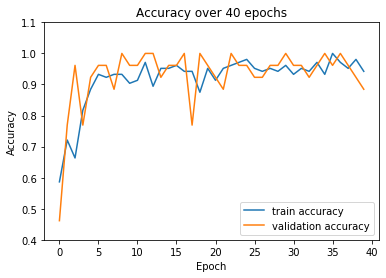

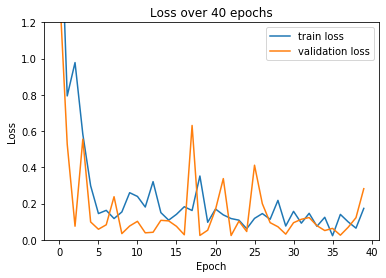

In [6]:
import matplotlib.pyplot as plt

# raise NotImplementedError("Plot the accuracy and the loss during training")

# Accuracy over 40 Epochs
plt.figure()
plt.plot(history.history['accuracy'], label='train accuracy') 
plt.plot(history.history['val_accuracy'], label = 'validation accuracy') 
plt.title('Accuracy over 40 epochs')
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.ylim([0.4, 1.1]) 
plt.legend(loc='lower right')

# Loss over 40 Epochs
plt.figure()
plt.plot(history.history['loss'], label='train loss') 
plt.plot(history.history['val_loss'], label = 'validation loss') 
plt.title('Loss over 40 epochs')
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.ylim([0, 1.2]) 
plt.legend(loc='upper right')


#### Plot Test Results

Found 18 images belonging to 2 classes.
Instructions for updating:
Please use Model.predict, which supports generators.
18/18 [==============================] - 5s 297ms/step
covid\nejmoa2001191_f3-PA.jpeg


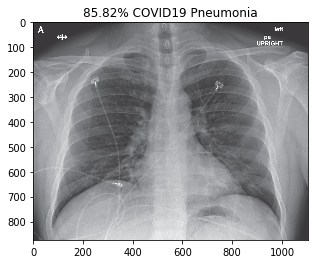

covid\nejmoa2001191_f4.jpeg


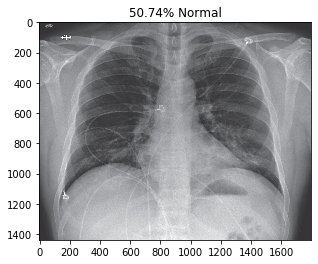

covid\nejmoa2001191_f5-PA.jpeg


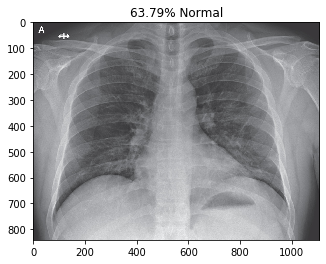

covid\radiol.2020200490.fig3.jpeg


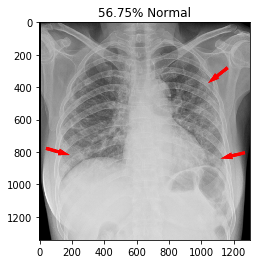

covid\ryct.2020200028.fig1a.jpeg


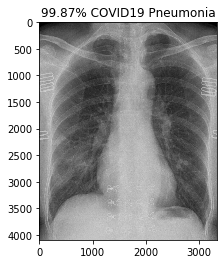

covid\ryct.2020200034.fig2.jpeg


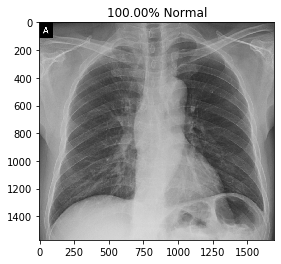

covid\ryct.2020200034.fig5-day0.jpeg


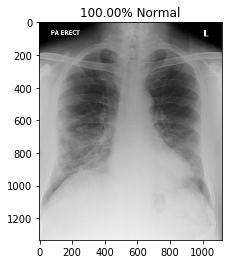

covid\ryct.2020200034.fig5-day4.jpeg


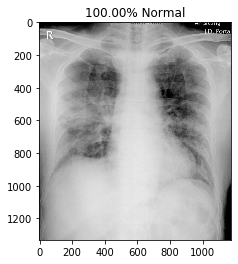

covid\ryct.2020200034.fig5-day7.jpeg


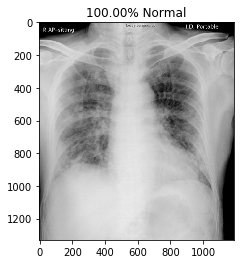

normal\NORMAL2-IM-1385-0001.jpeg


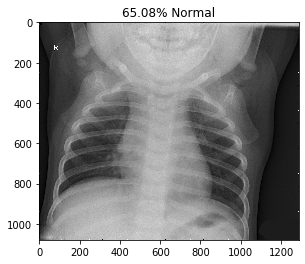

normal\NORMAL2-IM-1396-0001.jpeg


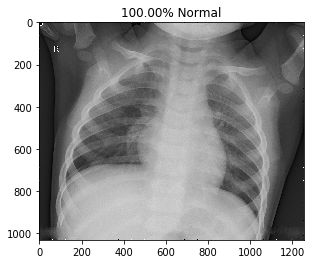

normal\NORMAL2-IM-1400-0001.jpeg


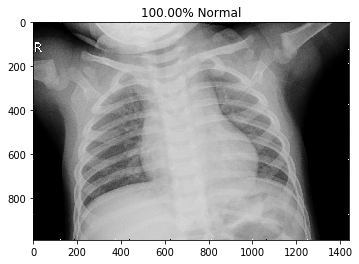

normal\NORMAL2-IM-1401-0001.jpeg


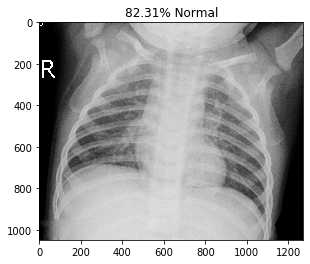

normal\NORMAL2-IM-1406-0001.jpeg


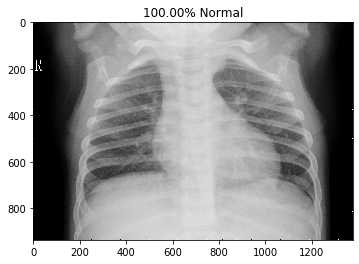

normal\NORMAL2-IM-1412-0001.jpeg


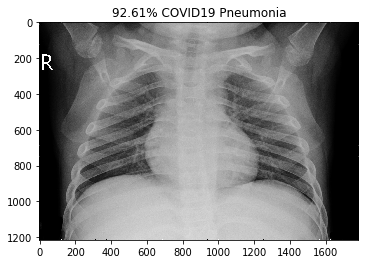

normal\NORMAL2-IM-1419-0001.jpeg


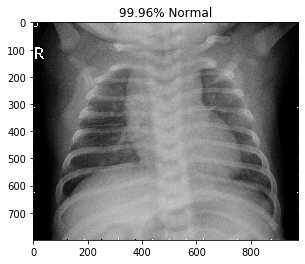

normal\NORMAL2-IM-1422-0001.jpeg


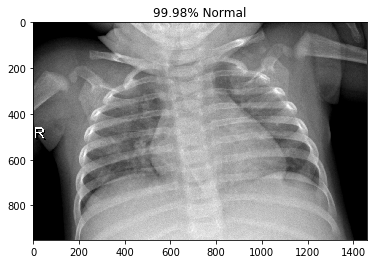

normal\NORMAL2-IM-1423-0001.jpeg


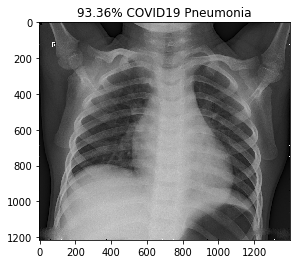

In [7]:
import matplotlib.image as mpimg

test_datagen = ImageDataGenerator(rescale=1. / 255)
eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="binary")
eval_generator.reset()

# pred = model.predict_generator(eval_generator,18,verbose=1)
pred = covid_model.predict_generator(eval_generator,18,verbose=1)

for index, probability in enumerate(pred):
    image_path = TEST_DIR + "/" +eval_generator.filenames[index]
    image = mpimg.imread(image_path)
    if image.ndim < 3:
        image = np.reshape(image,(image.shape[0],image.shape[1],1))
        image = np.concatenate([image, image, image], 2)
        # print(image.shape)

    pixels = np.array(image)
    plt.imshow(pixels)
    
    print(eval_generator.filenames[index])
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% Normal")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% COVID19 Pneumonia")
    plt.show()

## [10 points] TSNE Plot
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a widely used technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. After training is complete, extract features from a specific deep layer of your choice, use t-SNE to reduce the dimensionality of your extracted features to 2 dimensions and plot the resulting 2D features.

Found 130 images belonging to 2 classes.
130/130 [==============================] - 38s 290ms/step
(130, 256)
(130, 2)


C:\Users\tanzi\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Legend does not support 'Red' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
C:\Users\tanzi\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Legend does not support 'Blue' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


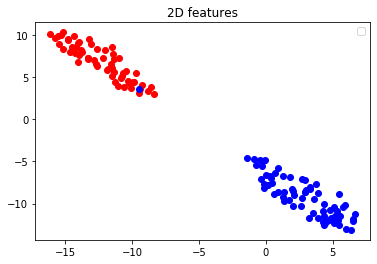

In [11]:
from sklearn.manifold import TSNE

intermediate_layer_model = tf.keras.models.Model(inputs=covid_model.input,
                                        outputs=covid_model.get_layer('dense').output)
tsne_data_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="binary")

# raise NotImplementedError("Extract features from the tsne_data_generator and fit a t-SNE model for the features,"
#                           "and plot the resulting 2D features of the two classes.")

outputs = intermediate_layer_model.predict_generator(tsne_data_generator,130,verbose=1)
print(outputs.shape)
label = tsne_data_generator.classes
features = TSNE(n_components=2).fit_transform(outputs)
print(features.shape)
# 到底是获取参数还是输出
plt.figure()
for index in range(len(features)):
    if label[index] == 0:
        # COVID
        plt.plot(features[index, 0], features[index, 1], 'ro')
    else:
        # normal
        plt.plot(features[index, 0], features[index, 1], 'bo')

plt.title('2D features')

# plt.legend(('Red', 'Blue'),('Covid', 'Normal'))


<!-- ## Task 2: COVID-19 vs Normal vs Tertiary Pneumonia (Bacterial and Viral) -->

<!-- #### Renew Training Batch and Validation Batch -->

<!-- #### Renew Model -->